# Week 2 - Preprocessing, part 2



## Who is my Audience?

My audience will be for potential investors or work prospects in the car insurance industry. It will initially be a portfolio type project to show case my analytic and presentation acumen.

## What do you need them to know or do?

I want to create a data based approach to identifying fraud in each stage of insurance and ultimately deliver a full service AI that can identify damages and it's estimate based on photos customers submit. For example, in the sales stage we can identify fraud concerns of sales agents with certain type of sales and frequency discounts offered. In the claim stage we can identify geographic/demographic information like location and public credit/legal data to identify to red flag claims and identify high risk areas. 

## How?

In the presentation to work prospects, I will first offer the background data and show examples of my model identifying fraud in easy to understand graphs and mappings. I will then build a Salesforce-like platform to show case how easily data can be integrated in to their existing data/model.


# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


For this week's homework I will be using "insurance_claims" data available on Mendeley.
https://data.mendeley.com/datasets/992mh7dk9y/2

The database has both demographic and financial background for each claim filed. And offers a crucial target data "fraud_reported" which indicates if a human auditor has identify fraud concerns, a task which I will attempt to automate.

In [3]:
#Summarize the datasets using info() and describe()

insurance = pd.read_csv('insurance_claims_mendeley.csv')
insurance.info()
insurance.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [4]:
#Are there any duplicate rows?

#find duplicate
insurance_dupe = insurance.duplicated()
insurance_dupe
#no duplicate rows.



0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [5]:
#What are the mean, median, and mode of each column?

#clean non-numerical data to numeric
insurance['policy_bind_date'] = pd.to_datetime(insurance['policy_bind_date'], errors='coerce')
insurance['fraud_reported'] = insurance['fraud_reported'].map({'Y': 1, 'N': 0})
insurance['policy_year'] = insurance['policy_bind_date'].dt.year

insurance_numeric = insurance.select_dtypes(include=['number']).copy()

summary = insurance_numeric.agg(['mean', 'median']).transpose()

# Calculate mode separately for each column
mode_values = {}
for col in insurance_numeric.columns:
    non_na_values = insurance_numeric[col].dropna()
    if not non_na_values.empty: 
        try:
            mode_values[col] = stats.mode(non_na_values, keepdims=True).mode[0]  # Updated syntax
        except Exception as e:
            mode_values[col] = None 
    else:
        mode_values[col] = None 


# Add mode to the summary dataframe
summary['Mode'] = summary.index.map(mode_values)

summary


/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,mean,median,Mode
months_as_customer,2.039540e+02,199.5,194.00
age,3.894800e+01,38.0,43.00
policy_number,5.462386e+05,533135.0,100804.00
policy_deductable,1.136000e+03,1000.0,1000.00
policy_annual_premium,1.256406e+03,1257.2,1073.83
umbrella_limit,1.101000e+06,0.0,0.00
insured_zip,5.012145e+05,466445.5,431202.00
capital-gains,2.512610e+04,0.0,0.00
capital-loss,-2.679370e+04,-23250.0,0.00
incident_hour_of_the_day,1.164400e+01,12.0,17.00


In [6]:
##Are there any missing or null values?

missing_values = insurance.isnull().sum()
missing_values

#Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?
print(insurance["authorities_contacted"]) 
#For long-term accessbility to the database, I will change authorities contacted's null value to False.
insurance['authorities_contacted'] = insurance['authorities_contacted'].fillna("False")
print(insurance["authorities_contacted"]) 

#Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)
#No other inconsistencies in the data

#Encode any categorical variables (e.g. with one-hot encoding.)
string_columns = insurance.select_dtypes(include=['object']).columns
insurance_encoded = pd.get_dummies(insurance, columns=string_columns, drop_first=True)
insurance_encoded


0      Police
1      Police
2      Police
3      Police
4         NaN
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object
0      Police
1      Police
2      Police
3      Police
4       False
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object


,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,2014-10-17,1000,1406.91,0,466132,53300,0,...,False,False,False,False,False,False,False,False,False,False
1,228,42,342868,2006-06-27,2000,1197.22,5000000,468176,0,0,...,False,False,False,False,False,False,False,False,False,False
2,134,29,687698,2000-09-06,2000,1413.14,5000000,430632,35100,0,...,False,True,False,False,False,False,False,False,False,False
3,256,41,227811,1990-05-25,2000,1415.74,6000000,608117,48900,-62400,...,False,False,False,False,False,True,False,False,False,False
4,228,44,367455,2014-06-06,1000,1583.91,6000000,610706,66000,-46000,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,1000,1310.80,0,431289,0,0,...,False,False,False,False,False,False,False,False,False,False
996,285,41,186934,2014-01-05,1000,1436.79,0,608177,70900,0,...,False,False,False,False,False,False,False,False,False,False
997,130,34,918516,2003-02-17,500,1383.49,3000000,442797,35100,0,...,False,False,False,False,False,False,False,False,False,False
998,458,62,533940,2011-11-18,2000,1356.92,5000000,441714,0,0,...,False,False,False,False,False,False,False,False,False,False


### Conclusions:

#Are the data usable?  If not, find some new data!
    Data is very usuable, specific code or changes in the data maybe needed for catagorical values which is lengthen the code base but I actual like that the database is so detailed.

#Do you need to modify or correct the data in some way?
    I changed the "authorities_contacted"'s null value to False so if someone else tries to use this data, they don't run into problems in feeding the data into their model.

#Is there any class imbalance?  (Categories that have many more items than other categories).
    "auto_model" class is very detailed and goes into specific model of the vehicle. This maybe too specific for any meaningful analysis for a dataset with 1000 values.
    Catagorical values like state will need to be assigned a numerical_id for each state to be more compatible for processing.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

policy_number                 -0.029443
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
policy_year                   -0.000059
incident_hour_of_the_day       0.004316
auto_year                      0.007928
age                            0.012143
policy_deductable              0.014817
insured_zip                    0.019368
months_as_customer             0.020544
bodily_injuries                0.033877
witnesses                      0.049497
number_of_vehicles_involved    0.051839
umbrella_limit                 0.058622
injury_claim                   0.090975
property_claim                 0.137835
total_claim_amount             0.163651
vehicle_claim                  0.170049
fraud_reported                 1.000000
_c39                                NaN
Name: fraud_reported, dtype: float64


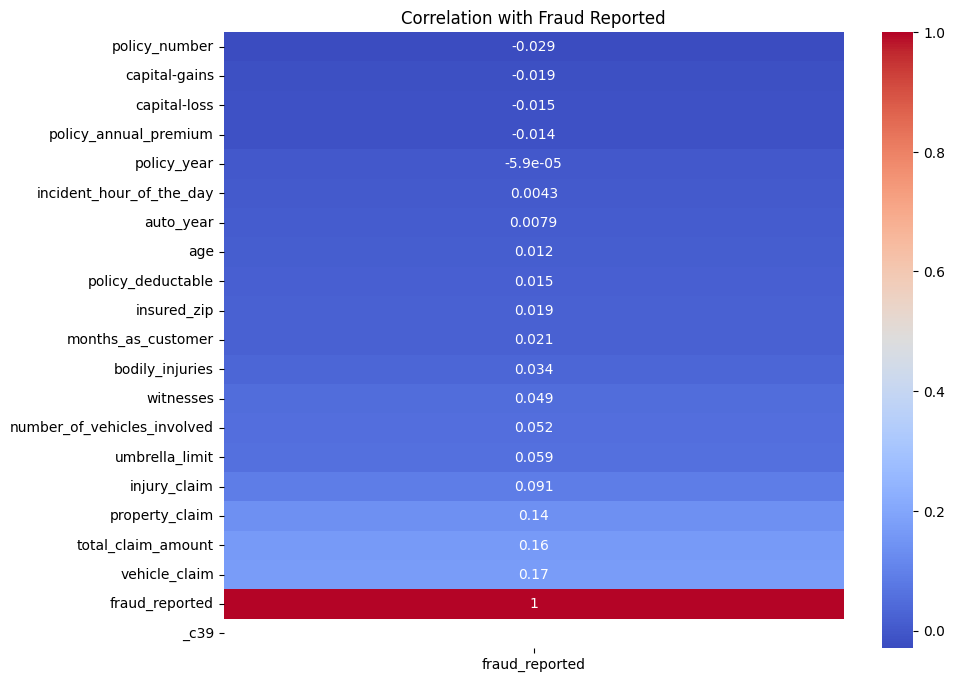

0       6510
1        780
2       7700
3       6340
4       1300
       ...  
995    17440
996    18080
997     7500
998     5220
999      460
Name: injury_claim, Length: 1000, dtype: int64
0            0
1      5000000
2      5000000
3      6000000
4      6000000
        ...   
995          0
996          0
997    3000000
998    5000000
999          0
Name: umbrella_limit, Length: 1000, dtype: int64


/tmp/ipykernel_2876/4110416053.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=insurance, x='injury_claim', y='fraud_reported', ci=None, palette='viridis')
/tmp/ipykernel_2876/4110416053.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=insurance, x='injury_claim', y='fraud_reported', ci=None, palette='viridis')


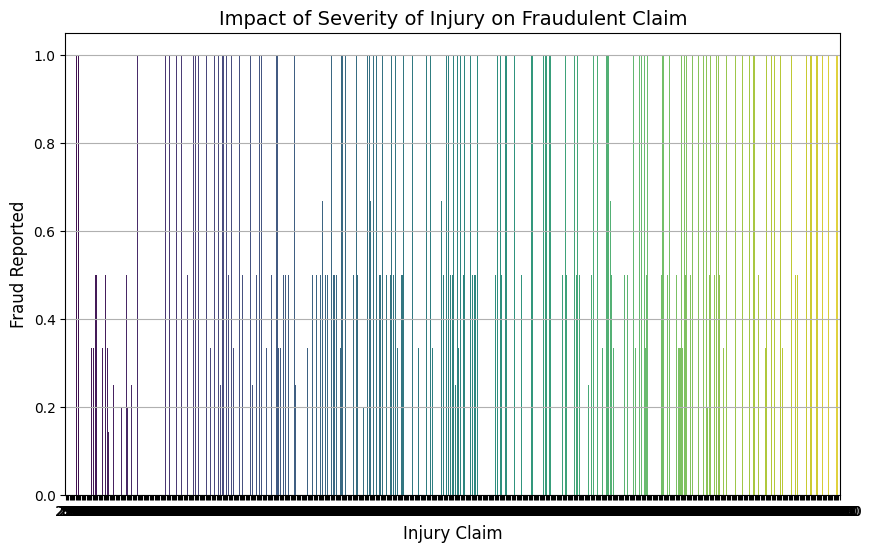

/tmp/ipykernel_2876/4110416053.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=insurance, x='umbrella_limit', y='fraud_reported', ci=None, palette='coolwarm')
/tmp/ipykernel_2876/4110416053.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=insurance, x='umbrella_limit', y='fraud_reported', ci=None, palette='coolwarm')


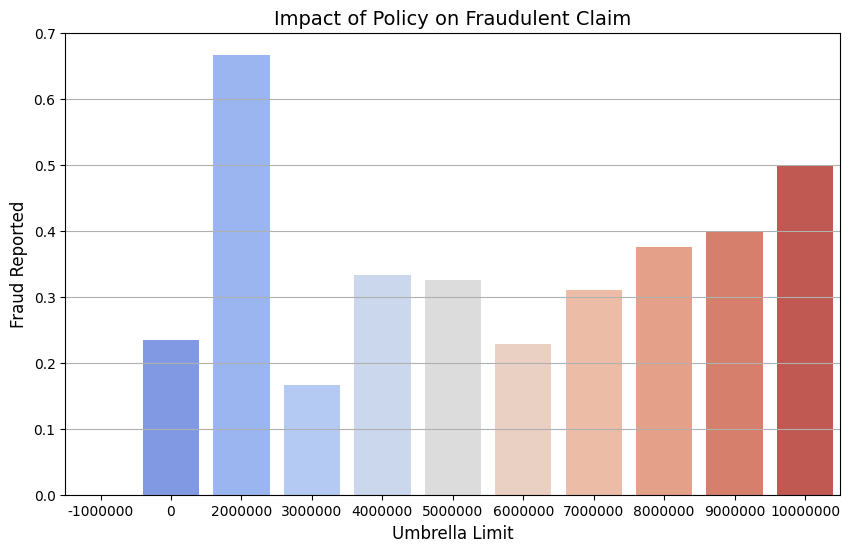

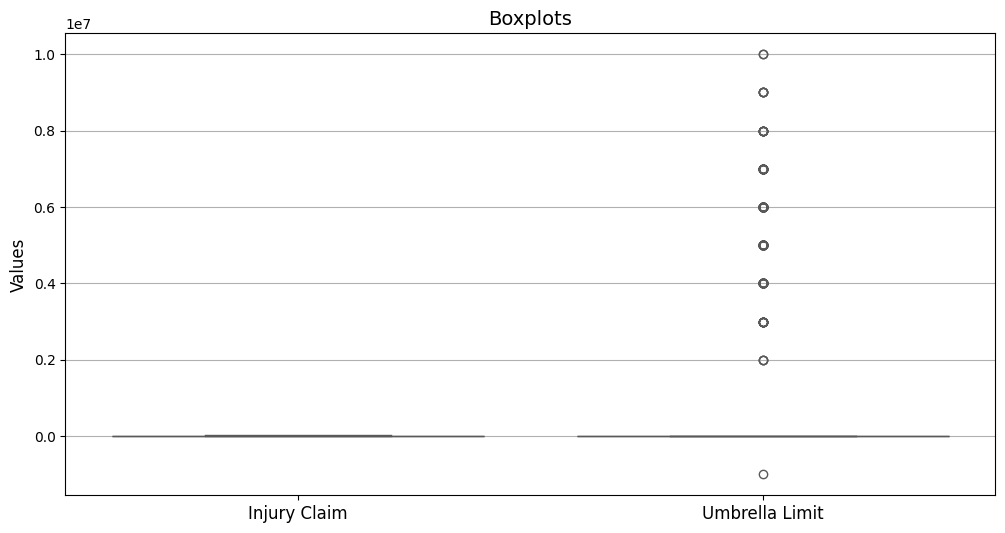

In [ ]:
# Compute correlations with 'fraud_reported'
insurance_corr = insurance_numeric.corr()['fraud_reported'].sort_values()
print(insurance_corr)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(insurance_corr.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation with Fraud Reported')
plt.show()

print(insurance_numeric["injury_claim"])
print(insurance_numeric["umbrella_limit"])
#We can see that amount of injury payout has an impact on fraud, which may suggest fraudulent claimants often tried to max out their payout by reportin an injury"

plt.figure(figsize=(10, 6))
sns.barplot(data=insurance, x='injury_claim', y='fraud_reported', ci=None, palette='viridis')
plt.title('Impact of Severity of Injury on Fraudulent Claim', fontsize=14)
plt.xlabel('Injury Claim', fontsize=12)
plt.ylabel('Fraud Reported', fontsize=12)
plt.grid(axis='y')
plt.show()

# Plot 2: Bar plot showing the mean of "umbrella_limit" grouped by "fraud_reported"
plt.figure(figsize=(10, 6))
sns.barplot(data=insurance, x='umbrella_limit', y='fraud_reported', ci=None, palette='coolwarm')
plt.title('Impact of Policy on Fraudulent Claim', fontsize=14)
plt.xlabel('Umbrella Limit', fontsize=12)
plt.ylabel('Fraud Reported', fontsize=12)
plt.grid(axis='y')
plt.show()
